In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = 6* np.random.rand(200,1) -3
y= 0.8 * x ** 2 +0.9 * x +2+ np.random.randn(200,1)


In [3]:
print(y.shape)
x.shape

(200, 1)


(200, 1)

In [4]:
new_x = np.reshape(x, -1)
new_y = np.reshape(y, -1)

In [5]:
print(new_y.shape)
new_x.shape

(200,)


(200,)

In [6]:
data = pd.DataFrame({
    "feature" : new_x,
    "output" : new_y
})

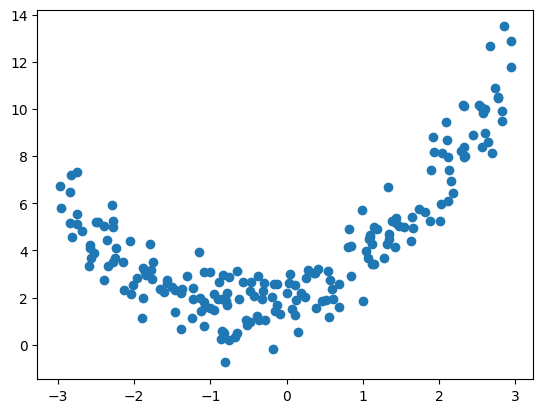

In [7]:
plt.scatter (new_x, new_y)

In [8]:
data.head()

,feature,output
0,-1.389011,0.666153
1,-1.839290,2.942115
2,-0.750795,2.872624
3,-0.891887,2.666049
4,2.093562,9.449712


In [9]:
#- - - - - - - - -  - - - STEP 2 - - - - - -  SPLIT the data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2) 

In [12]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print(f"x_test: {x_test.shape}, y_test : {y_test.shape}" )

x_train:  (160, 1)
y_train:  (160, 1)
x_test: (40, 1), y_test : (40, 1)


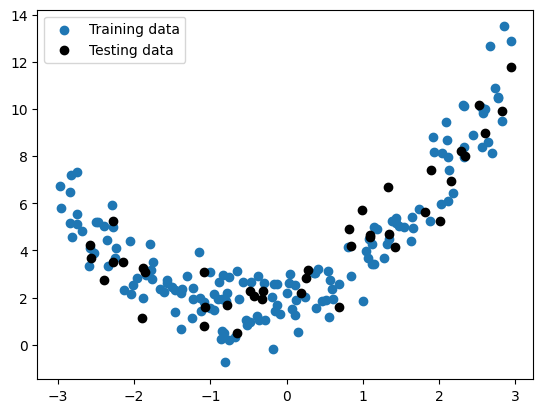

In [13]:
plt.scatter (x_train, y_train, label = "Training data")
plt.scatter (x_test, y_test, color = "black", label = "Testing data")
plt.legend()

In [14]:
"""# - - - -- - - - - - - - - STEP 3 - - - Import linear Regression and creat a instance"""

'# - - - -- - - - - - - - - STEP 3 - - - Import linear Regression and creat a instance'

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [17]:
model

LinearRegression()

In [18]:
model.fit(x_train, y_train) # Always train the training data , to find patterns and make predictions

LinearRegression()

In [19]:
y_pred = model.predict(x_test)
y_pred.shape

(40, 1)

In [20]:
"""# - - - - - - - - - STEP 4 - - - - - - Import POLYNOMIAL FEATURES and fit_trainsform the data"""

'# - - - - - - - - - STEP 4 - - - - - - Import POLYNOMIAL FEATURES and fit_trainsform the data'

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
poly = PolynomialFeatures(degree= 3) # Degree is a Hyperparameter

In [23]:
poly

PolynomialFeatures(degree=3)

In [24]:
x_train_new = poly.fit_transform(x_train)
x_test_new = poly.fit_transform(x_test)  # transforming x_test also to compare the output

In [25]:
x_train_new.shape   

(160, 4)

In [26]:
# x_train_new.head() #currently its a nd.array, not in a DFrame, 

In [27]:
# Creating new features to store the data of X_train_new as its generated 
# via PolynomialFeatures "degree= 3"(x0,x1,x2)

In [28]:
# A dataframe is a 2-D data collection, it's a data structure which store data in a tabular form.
df = pd.DataFrame({
    "feature1": x_train_new[:,0],
    "feature2": x_train_new[:,1],
    "feature3": x_train_new[:,2],
    "output"  : y_train.reshape(-1)   #it flattens the array into a 1D
})

In [29]:
df.head()

,feature1,feature2,feature3,output
0,1.0,-1.228335,1.508808,1.937300
1,1.0,0.149398,0.022320,0.548402
2,1.0,1.432857,2.053080,5.167208
3,1.0,-0.849182,0.721109,1.957656
4,1.0,0.518918,0.269276,1.895450


In [30]:
""" - - - - - - - - - -  STEP 5 - - - - - - - Again seprating independent and dependent data,
and creating a linear regression model to train the new data, with the y_train data.
"""

' - - - - - - - - - -  STEP 5 - - - - - - - Again seprating independent and dependent data,\nand creating a linear regression model to train the new data, with the y_train data.\n'

In [31]:
""" - - - - - - - - - - STEP 5 - - - - - - Applying/ Fitting the data via linear regression - - - - 
and to get Coeficient and Intercept value"""

' - - - - - - - - - - STEP 5 - - - - - - Applying/ Fitting the data via linear regression - - - - \nand to get Coeficient and Intercept value'

In [32]:
# x_data = df.iloc[:, 0:3]
# x_data.head()

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
xyz = LinearRegression()

In [35]:
xyz.fit(x_train_new, y_train)

LinearRegression()

In [36]:
xyz.coef_

array([[0.        , 0.90389443, 0.8386447 , 0.0085722 ]])

In [37]:
xyz.intercept_

array([1.82884817])

In [38]:
# - - - - Ploting the dataset on graph - - - - - - - - - 

In [39]:
# x_new = np.linespace(starting x axis point, ending x axis point, total data points)

x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.fit_transform(x_new)
y_new = xyz.predict(x_new_poly)

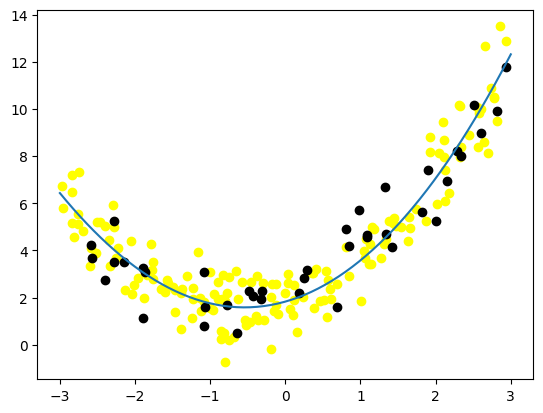

In [40]:
plt.scatter (x_train, y_train, color = "yellow")
plt.scatter (x_test, y_test, color = "black")
plt.plot(x_new, y_new)

In [41]:
# Now executing the whole process, via using class.

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [63]:
def polynomial_degree_checker (degree):
    x_new = np.linspace(-3,3,200).reshape(200,1)
    # x_new_poly = poly.fit_transform(x_new)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

    poly = PolynomialFeatures( degree = degree)
    x_train_new = poly.fit_transform(x_train)
    x_test_new = poly.fit_transform(x_test)

    # std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    lin_reg.fit(x_train_new, y_train)

    df_test = pd.DataFrame({
        "feature1":x_test_new[:,0],
        "feature2":x_test_new[:,1],
        "feature3":x_test_new[:,2],
        "output":y_test.reshape(-1)
    })

    x_data_test = df_test.iloc[:, 0:3]
    y_pred_new = lin_reg.predict(x_data_test)
    print("r2_score:",r2_score(y_pred_new, y_test))

    x_new = np.linspace(-3,3,200).reshape(200,1)
    x_new_poly = poly.fit_transform(x_new)
    y_new = lin_reg.predict(x_new_poly)

    plt.scatter(x_train, y_train, color = "yellow", label= "Training data")
    plt.scatter(x_test, y_test, color = "black", label = "Testing data")
    plt.plot(x_new, y_new, label = "Predicted line")
    plt.legend()
    


r2_score: 0.8940584140788687


C:\Users\Farogh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


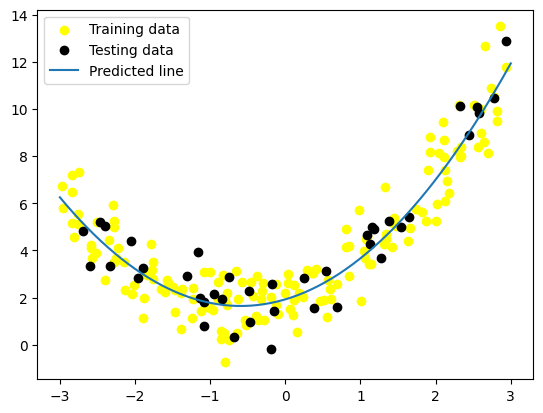

In [71]:
polynomial_degree_checker(2)